In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow import keras
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'chest_Xray/train/'
valid_path = 'chest_Xray/val/'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('chest_Xray/train/*')
x = Flatten()(vgg.output)

In [6]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('chest_Xray/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('chest_Xray/val/',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical')



test_set = test_datagen.flow_from_directory('chest_Xray/test/',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs = 1,
    validation_data=validation_set,
    validation_steps=len(validation_set)
    # callbacks=[early_stop]
)



522/522 [==============================] - 504s 964ms/step - loss: 0.1968 - accuracy: 0.9268 - val_loss: 0.5703 - val_accuracy: 0.6875


In [11]:
score = model.evaluate(test_set)
print("Loss:", score[0])
print("Accuracy:", score[1])

63/63 [==============================] - 54s 855ms/step - loss: 0.3501 - accuracy: 0.9151
Loss: 0.3501124680042267
Accuracy: 0.9150640964508057


In [12]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Précision du modèle')
# plt.ylabel('Précision')
# plt.xlabel('Epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [13]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Perte du modèle')
# plt.ylabel('Perte')
# plt.xlabel('Epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
import itertools


class_names = ['Normal', 'Pneumonia']

y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)



522/522 [==============================] - 457s 874ms/step


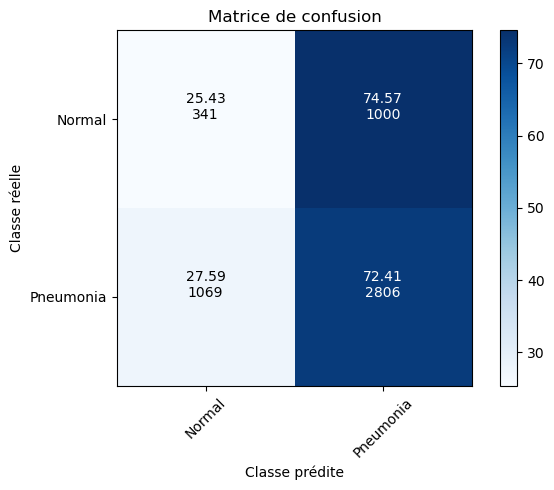

In [16]:
# Obtenir les vraies classes de l'ensemble de test
y_true = training_set.classes

# Calculer la matrice de confusion
confusion_mtx = confusion_matrix(y_true, y_pred)

# Calculer les pourcentages dans chaque cellule de la matrice de confusion
confusion_mtx_percentages = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100.0

# Afficher la matrice de confusion avec les pourcentages et les nombres
plt.imshow(confusion_mtx_percentages, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

fmt = '.2f'
thresh = confusion_mtx_percentages.max() / 2.
for i, j in itertools.product(range(confusion_mtx_percentages.shape[0]), range(confusion_mtx_percentages.shape[1])):
    plt.text(j, i, format(confusion_mtx_percentages[i, j], fmt) + '\n' + str(confusion_mtx[i, j]), horizontalalignment="center", color="white" if confusion_mtx_percentages[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Classe réelle')
plt.xlabel('Classe prédite')
plt.show()


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray_GH.h5')